In [1]:
import os
import random
import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.layers import Conv2D, MaxPooling2D, Activation , Flatten, Dense
from keras.layers import LSTM, GRU

Using TensorFlow backend.


[load_dataset] loading ShapeNet
[get_ShapeNet_paths]
[write_mesh_renders_to_disk]
[get_renders]


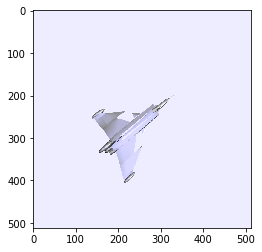

In [2]:
# inline output images
%matplotlib inline

# generate data

X=datasets.load_dataset("ShapeNet")
input_shape=X.shape[1:]

# display sample from data
plt.imshow(random.choice(X))

In [3]:
net = Sequential()
n_convfilter = [96, 128, 256, 256, 256, 256]
n_kernel_size=[(7, 7),(3,3),(3,3),(3,3),(3,3),(3,3)]
n_fc_filters = [1024]
n_deconvfilter = [128, 128, 128, 64, 32, 2]

In [4]:
# encoder network
for i in range(6):
    #tf.name_scope("block")
    net.add(Conv2D(filters=n_convfilter[i],kernel_size= n_kernel_size[i],input_shape=input_shape))
    net.add(MaxPooling2D())
    net.add(Activation('relu'))

In [5]:
net.add(Flatten())
net.add(Dense(n_fc_filters[0]))

In [6]:
# lstm
gru_layer=GRU(n_fc_filters[0])

In [7]:
gru_layer

In [8]:
# decoder network

In [9]:
net.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
os.system("rm -rf ./logs/*")
tensor_board=TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
net.fit(X,np.random.rand(len(X),n_fc_filters[0]),epochs=1,callbacks=[tensor_board])

Epoch 1/1
5/5 [==============================] - 23s 5s/step - loss: 5103.2441 - acc: 0.0000e+00
